<a href="https://colab.research.google.com/github/spprou/spprou/blob/main/%EC%95%88%EB%A9%B4%EC%9D%B8%EC%8B%9D_CNN(%EC%9B%90%EB%B3%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
import imageio

<ipython-input-33-d8fe6440f013>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('./data/1_1.png') #샘플로 data폴더의 1_1.png 파일을 read


세로, 가로 :  (112, 92)


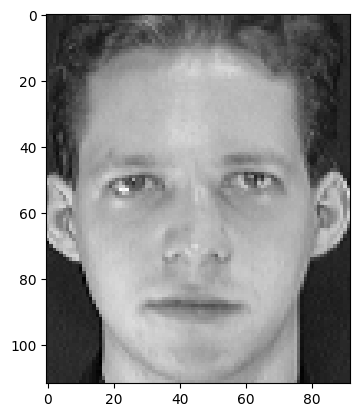

In [ ]:
#이미지 샘플을 하나 확인해보기
im = imageio.imread('./data/1_1.png') #샘플로 data폴더의 1_1.png 파일을 read
plt.imshow(im, cmap='gray') # 이미지 출력해보기
print("세로, 가로 : ",im.shape) # 이미지 가로 세로 픽셀 구하기

In [ ]:
# 이미지 모두 처리
x_train = [] # 학습 이미지 담을 변수
y_train = [] # 학습 이미지에 해당하는 라벨
x_test = [] # 테스트 이미지 담을 변수
y_test = [] # 테스트 이미지에 해당하는 라벨

for i in range(40):                                                     # 총 40명의 사람
    for j in range(10):                                                 #사람 당 10장
        temp_img = imageio.imread('./data/{}_{}.png'.format(i+1, j+1))  # 사진 한장 불러오기
        if j<8: # 사람당 8장은 학습 이미지로 사용
            x_train.append(temp_img)   # 사진 담기
            y_train.append(i+1)        # 해당 사진의 라벨 달기
        else : # 사람당 2장은 테스트 이미지로 사용
            x_test.append(temp_img)    # 사진 담기
            y_test.append(i+1)         # 해당 사진 라벨 담기


# 모두 배열로 변경
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test)
y_test = np.array(y_test).reshape(-1,1)

<ipython-input-34-363516ab225b>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  temp_img = imageio.imread('./data/{}_{}.png'.format(i+1, j+1))  # 사진 한장 불러오기


In [ ]:
# 라벨 데이터 one-hot 으로 변경
# 1 --> (1,0,0,0 ...)   2 --> (0,1,0,0,0 ...) 3 -> (0,0,1,0,0 ...) 이런식으로 바꿔주는 작업
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_train)
y_train = enc.transform(y_train).toarray()

real_label=y_test # real_label에 one-hot 전 라벨을 담기. 나중에 예측값과 비교해보기 위해서.
enc.fit(y_test)
y_test = enc.transform(y_test).toarray()


In [ ]:
# 데이터 처리 후 최정형태 확인하기
print("학습 이미지 파일 형태 : ", x_train.shape)   # 320장 * 112 * 92
print("학습 라벨 형태 : ", y_train.shape) # 320장 * 40(one-hot)
print("테스트 이미지 파일 형태 : ", x_test.shape)   # 80장 * 112 * 92
print("테스트 라벨 형태 : ", y_test.shape) # 80장 * 40(one-hot)

x_train = x_train.reshape(320,112,92,1) # 형태 변환 (흑백사진은 뒤에 1을 붙여줘야함, 칼라는 3)
x_test = x_test.reshape(80,112,92,1)    # 형태 변환 (흑백사진은 뒤에 1을 붙여줘야함, 칼라는 3)
# 여기 까지가 데이터 전처리 완료

학습 이미지 파일 형태 :  (320, 112, 92)
학습 라벨 형태 :  (320, 40)
테스트 이미지 파일 형태 :  (80, 112, 92)
테스트 라벨 형태 :  (80, 40)


In [ ]:
# CNN (Convolutional Neural Net) 모델 구현하기
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

# tf.set_random_seed(1) # Deprecated
tf.random.set_seed(1) # Use this instead

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu', input_shape=(112,92,1)))
# 16개 filter 사용, 3*3 크기 필터, 활성화 함수는 relu 사용, input 형태는 112,92,1 (세로,가로,흑백)
model.add(BatchNormalization())
# 과적합 방지 배치 노멀 처리

model.add(Conv2D(32, (3, 3), activation='relu'))
# 32개 filter 사용, 3*3 크기 필터, 활성화 함수는 relu
model.add(BatchNormalization())
# 과적합 방지 배치 노멀 처리

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# 맥스풀링 사용, 크기는 2*2, padding 처리

model.add(Conv2D(32, (3, 3), activation='relu'))
# 32개 filter 사용, 3*3 크기 필터, 활설화 함수는 relu
model.add(BatchNormalization())
# 과적합 방지 배치 노멀 처리

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# 맥스 풀링 사용, 크기는 2*2, padding 처리

# 위와 동일
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
# 추출되는 특징값을 펼치기

model.add(Dense(320, activation='relu', kernel_initializer='he_normal'))
# 분류를 위한 DENSE레이어와 연결, 사용한 뉴런은 320개, 활성화 함수는 relu
model.add(BatchNormalization())
# 과적합 방지 배치노멀 처리

model.add(Dense(40, activation='softmax'))
# 총 40명의 사람을 분류하기 위해 출력층은 40

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
# 학습 방법은 adam 을 사용


In [ ]:
model.summary() # 구현한 모델 형태 확인해보기(gpu사용X)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 110, 90, 16)       160       
                                                                 
 batch_normalization_18 (Ba  (None, 110, 90, 16)       64        
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 108, 88, 32)       4640      
                                                                 
 batch_normalization_19 (Ba  (None, 108, 88, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 44, 32)        0         
 ng2D)                                                           
                                                      

In [ ]:
# 모델 학습시키기
model.fit(x_train, y_train,
          batch_size=8, # 배치사이즈 8, 8개 단위로 갱신
          epochs=15,    # 15번의 학습을 의미함. 마음대로 변경 해서 사용 가능
          verbose=1,    # 학습 화면 가시화
          shuffle=True, # 데이터 섞어서 학습
          validation_data=(x_test, y_test))  # validation set은 test set과 동일하게 설정


Epoch 1/15
40/40 [==============================] - 14s 279ms/step - loss: 2.7363 - accuracy: 0.3438 - val_loss: 3.4966 - val_accuracy: 0.0750
Epoch 2/15
40/40 [==============================] - 9s 219ms/step - loss: 0.6102 - accuracy: 0.8813 - val_loss: 2.7257 - val_accuracy: 0.2125
Epoch 3/15
40/40 [==============================] - 9s 234ms/step - loss: 0.1791 - accuracy: 0.9937 - val_loss: 1.9841 - val_accuracy: 0.6000
Epoch 4/15
40/40 [==============================] - 10s 248ms/step - loss: 0.0715 - accuracy: 1.0000 - val_loss: 1.4082 - val_accuracy: 0.7250
Epoch 5/15
40/40 [==============================] - 8s 208ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.9207 - val_accuracy: 0.7875
Epoch 6/15
40/40 [==============================] - 10s 243ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.6468 - val_accuracy: 0.8875
Epoch 7/15
40/40 [==============================] - 10s 253ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.5058 - val_accuracy: 0.9000
Ep

In [ ]:
# TEST 데이터로 결과 확인해보기
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1]) # TEST 데이터에 대한 정확도

Test accuracy: 0.9375


In [ ]:
# 모델이 예측한 라벨과 실제 라벨 비교해 보기
# 라벨의 의미 1 = 1번째 사람, 2 = 2번째 사람 .... 40 = 40번째 사람
real_label = real_label.reshape(-1)
print("실제 라벨 : ",real_label)
pred = model.predict(x_test) # Use predict() instead of predict_classes()
pred = np.argmax(pred, axis=1) # Get the index of the class with the highest probability
pred = pred+1
print("예측 라벨 : ",pred)

실제 라벨 :  [ 1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11 12 12
 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24
 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36
 37 37 38 38 39 39 40 40]
3/3 [==============================] - 3s 433ms/step
예측 라벨 :  [ 1  1  2  2  3  3  4  4  5 40  6  6  7  7  8  8  9  9 10  8 11 11 12 12
 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24
 25 25 26 26 27 27 27 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 27
 37 37  3 38 39 39 40 40]


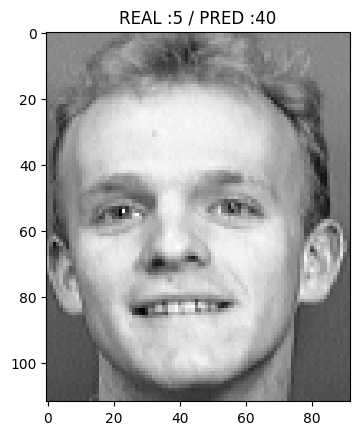

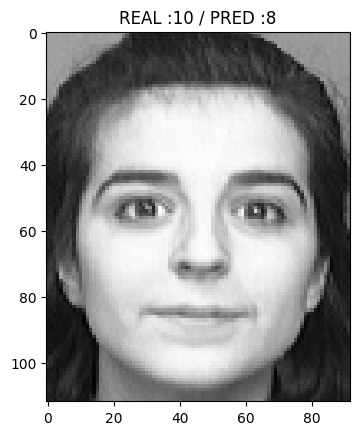

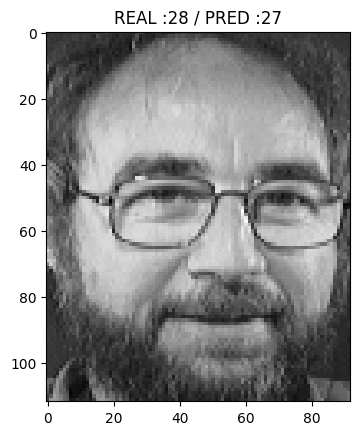

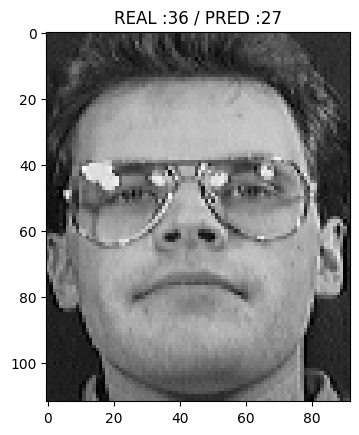

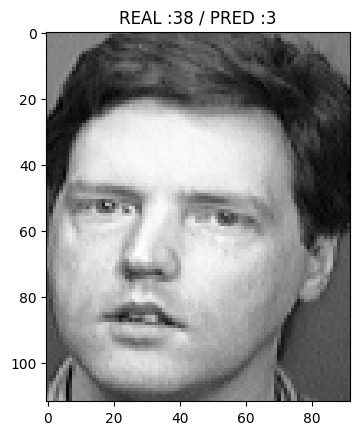

In [ ]:
# 실제와 예측이 틀린 index
index=[]
error=[]
real =[]
for i in range(80):
    if real_label[i]!=pred[i]:
        index.append(i)
        error.append(pred[i])
        real.append(real_label[i])

# 틀리게 예측한 이미지 보기 (REAL 이미지)
test_image = x_test.reshape(80,112,92)
for j in range(len(index)):
    temp = index[j]
    plt.figure()
    plt.title('REAL :{} / PRED :{}'.format(real[j],error[j]))
    plt.imshow(test_image[temp], cmap='gray')